In [1]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A
import pandas as pd
from PIL import Image

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)
    
def transform(image,label):
    return 1;

base_path = "/int_data/house-count"

In [2]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.ISONoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        #A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),            
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),            
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])



In [5]:


data_df = pd.read_csv(base_path+"/train.csv")




copy_transform_count = 10

random.seed(42)


lst_row = []

for i in range(len(data_df)):
    image_name, label = data_df.iloc[i]['img_num'], data_df.iloc[i]['number_of_houses']
    
    image = cv2.imread(f'{base_path}/train/{image_name}')
    image_for_save = Image.fromarray(image)
    image_for_save.save(base_path + "/train_a/" + image_name)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    augmented_image = transform(image=image)['image']
    
    d = {"img_num": image_name, 'number_of_houses':label}        
    lst_row.append(d)
    
    
    for k in range(copy_transform_count):
        
        #print(image_name.replace(".", "_"+str(k)+"."))
        augmented_image = transform(image=image)['image']
        d = {"img_num": image_name.replace(".", "_"+str(k)+"."), 'number_of_houses':label}        
        lst_row.append(d)        
        image_for_save = Image.fromarray(augmented_image)
        image_for_save.save(base_path + "/train_a/" + image_name.replace(".", "_"+str(k)+"."))
    
print(len(lst_row))
data_a_df = pd.DataFrame(lst_row, columns = ['img_num','number_of_houses'])
print("totla files:",len(data_a_df))
data_a_df.to_csv(base_path+"/train_a.csv", index=False)


23100
totla files: 23100


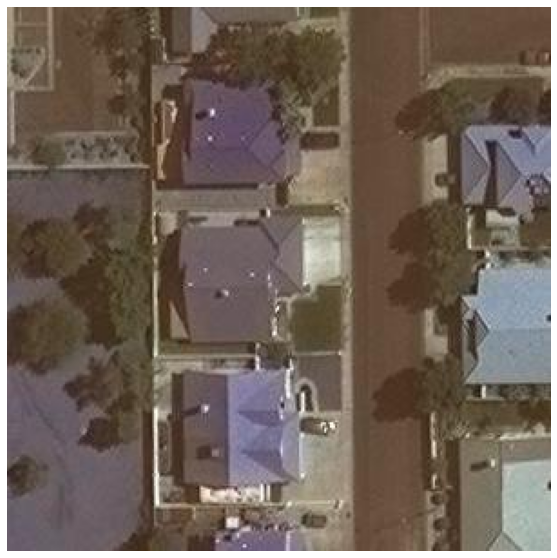

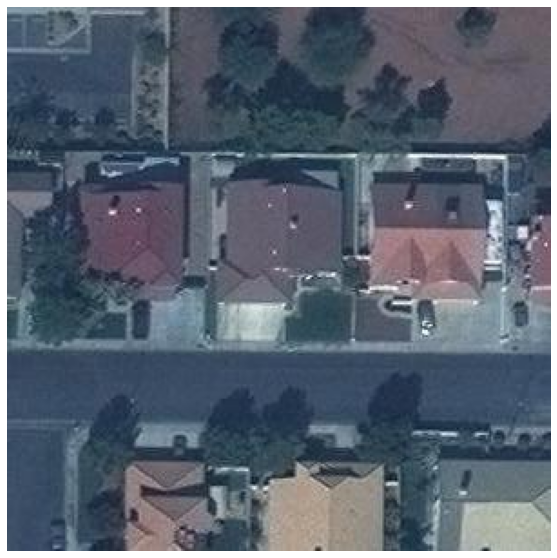

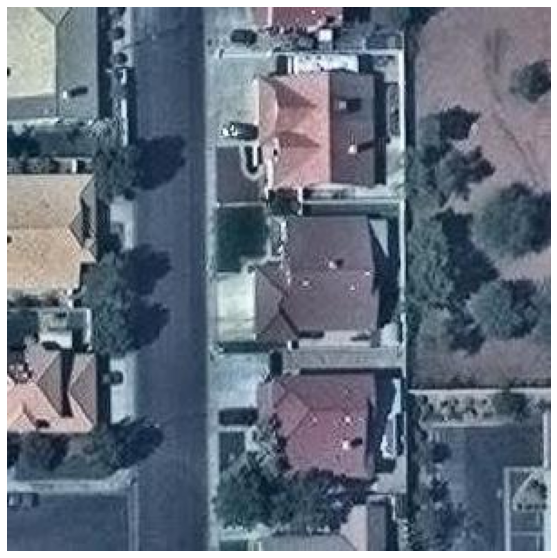

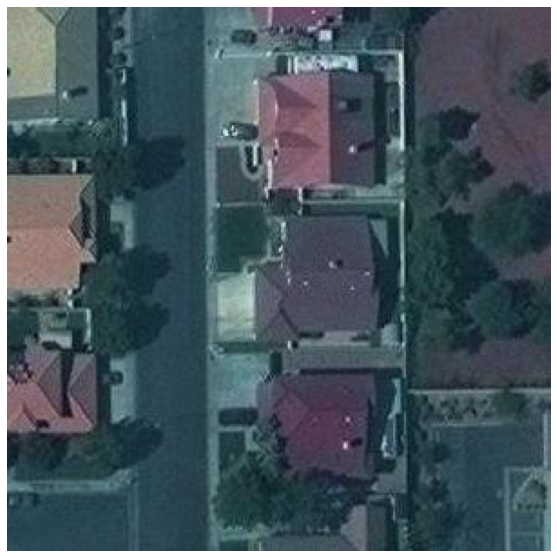

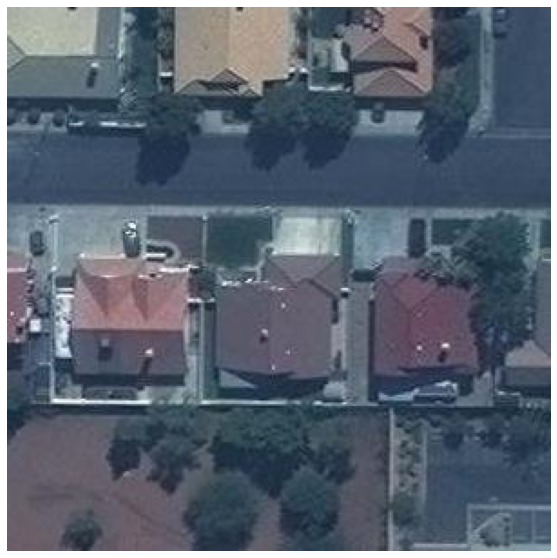

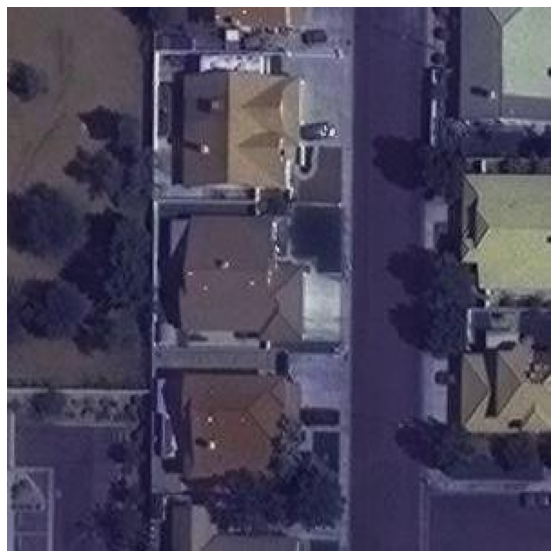

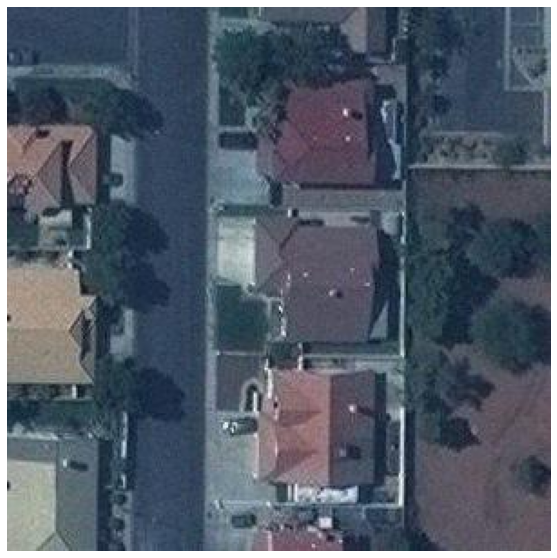

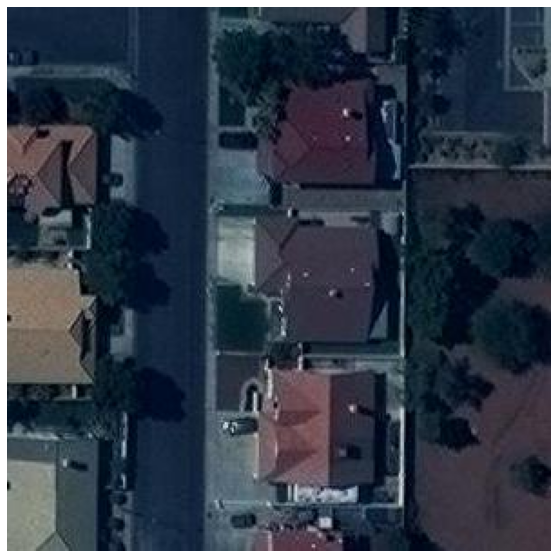

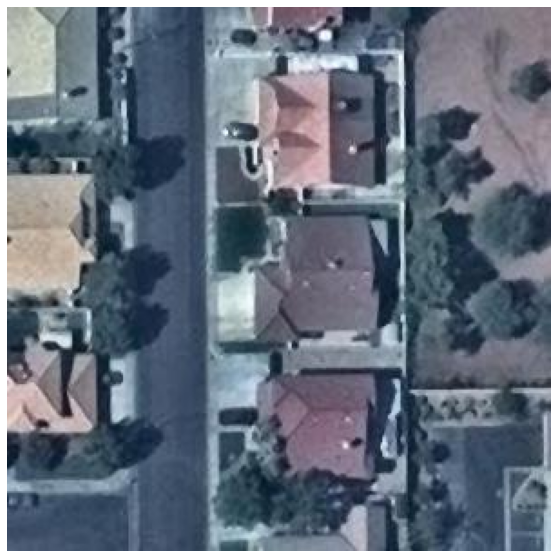

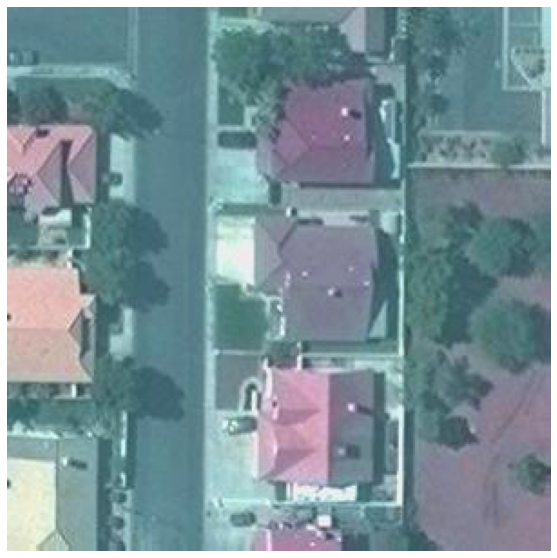

In [4]:
for i in range(copy_transform_count):
    image_name, label = data_a_df.iloc[i]['img_num'], data_df.iloc[i]['number_of_houses']
    image = cv2.imread(f'{base_path}/train_a/{image_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    visualize(image)